## Spatial neighbourhood - exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree, BallTree
from sklearn.cluster import DBSCAN
import pickle
import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: "%14.7g" % x))

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
# Import of the time-series data and the location of all the points
locs = np.load('geographical_location.npy')
locsm = np.load('geographical_location_m.npy')
data_imp = pd.read_pickle('AmsData_measurements.pkl')
mydata = (data_imp.T * 1000).T
orig_x = np.load('orig_x.npy')

with open('all_corrs.bin', 'rb') as file:
    all_corrs = pickle.load(file)

In [3]:
locs[324]

array([      52.37821,        4.90653])

In [4]:
ts_num = 3999 #325#88

In [35]:
all_corrs[ts_num]

{'values': array([             1,      0.8919729,       0.939767,       0.952265,      0.9316032,      0.8074764]),
 'method': array([2, 1, 1, 1, 1, 1]),
 'index': array([3999, 3996, 3988, 3998, 3991, 3993])}

In [8]:
idx_thresh = np.where(all_corrs[ts_num]['values'] > 0.9)[0]
data_to_stack = [mydata.iloc[all_corrs[ts_num]['index'][i]].values for i in idx_thresh]
mts = np.vstack(data_to_stack)

In [9]:
[all_corrs[ts_num]['index'][i] for i in idx_thresh]

[3999, 3988, 3998, 3991]

In [10]:
mts.shape

(4, 219)

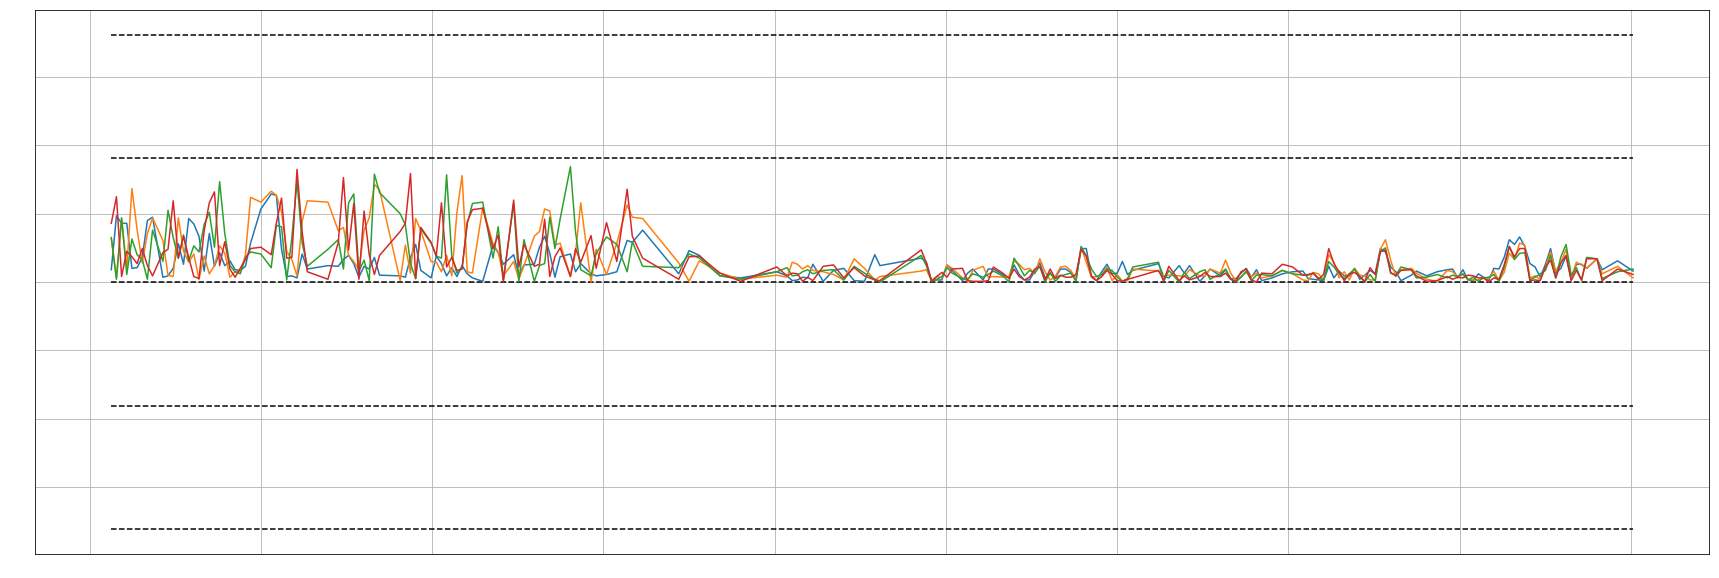

In [15]:
plt.figure(figsize=(30, 10))
# plt.plot(mydata.columns[1:], np.diff(mts).T)
# plt.plot(mydata.columns[1:], np.abs((np.diff(mts) - np.diff(mts[0,:])).T))
plt.plot(mydata.columns[1:], np.abs((np.diff(mts).T)))
# plt.hlines(18.1, 0, 218, linestyles='dashed')
# plt.hlines(0, 0, 218, linestyles='dashed')
# plt.hlines(-18.1, 0, 218, linestyles='dashed')
# plt.hlines(-36.2, 0, 218, linestyles='dashed')

# for i in range(-4, 5):
#     plt.hlines(i*(18.1/2), mydata.columns[1], mydata.columns[-1], linestyles='dashed')
    
for i in range(-2, 3):
    plt.hlines(i*(18.1), mydata.columns[1], mydata.columns[-1], linestyles='dashed')
    
# plt.hlines(36.2/2, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
# plt.hlines(18.1/2, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
# plt.hlines(0, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
# plt.hlines(-18.1/2, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
# plt.hlines(-36.2/2, mydata.columns[1], mydata.columns[-1], linestyles='dashed')

plt.grid()
plt.show()

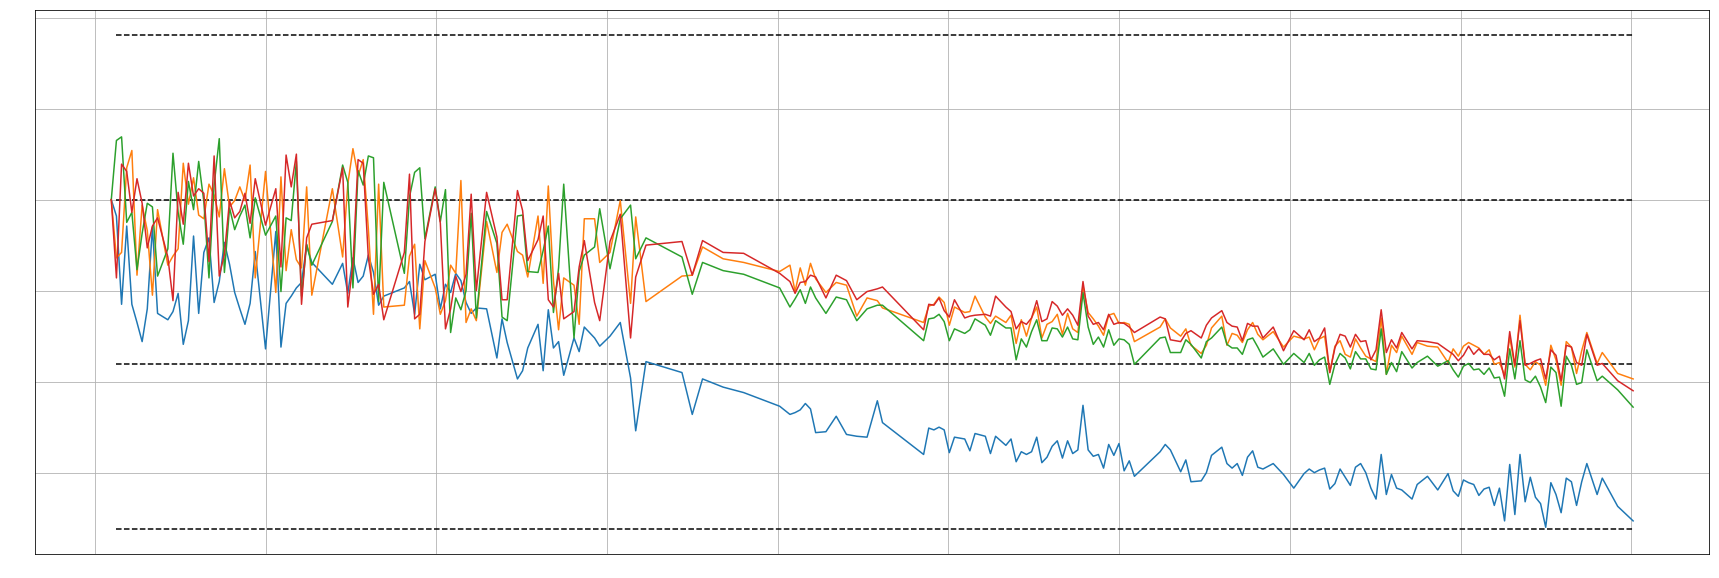

In [40]:
plt.figure(figsize=(30, 10))
plt.plot(mydata.columns[:], mts.T)
# plt.plot(mydata.columns[1:], np.diff(mts).T)
# plt.plot(mydata.columns[1:], (np.diff(mts) - np.diff(mts[0,:])).T)
# plt.hlines(18.1, 0, 218, linestyles='dashed')
# plt.hlines(0, 0, 218, linestyles='dashed')
# plt.hlines(-18.1, 0, 218, linestyles='dashed')
# plt.hlines(-36.2, 0, 218, linestyles='dashed')

plt.hlines(18.1, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
plt.hlines(0, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
plt.hlines(-18.1, mydata.columns[1], mydata.columns[-1], linestyles='dashed')
plt.hlines(-36.2, mydata.columns[1], mydata.columns[-1], linestyles='dashed')

plt.grid()
plt.show()